<a href="https://colab.research.google.com/github/ZaKSa/Machine-learning/blob/main/D_QM_05_01_%D0%9E%D1%81%D0%BE%D0%B1%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D1%84%D0%B8%D0%BD%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D1%8B%D1%85_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D0%BE%D0%BB%D0%B0%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B8_%D0%B4%D0%BE%D1%85%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Проведите декомпозицию ряда на составляющие для того, чтобы получить стационарный ряд. Сделайте проверку получившегося ряда тестом Дики — Фуллера

Продолжите решение:

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df=pd.read_csv('/content/sample_data/D_QM_05_01_AirPassengers.csv')
 
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
print(len(df))

144


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
#df['Month']=pd.to_datetime(df['Month'])
#df['Month'].astype(float)
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
indexedDataset = df.set_index(['Month'])

from datetime import datetime
indexedDataset['1949-03']
indexedDataset['1949-03':'1949-06']
indexedDataset['1949']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<ipython-input-12-f5da46700cf1>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  indexedDataset['1949-03']
<ipython-input-12-f5da46700cf1>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  indexedDataset['1949']


Text(0, 0.5, 'Month')

<Figure size 1000x400 with 0 Axes>

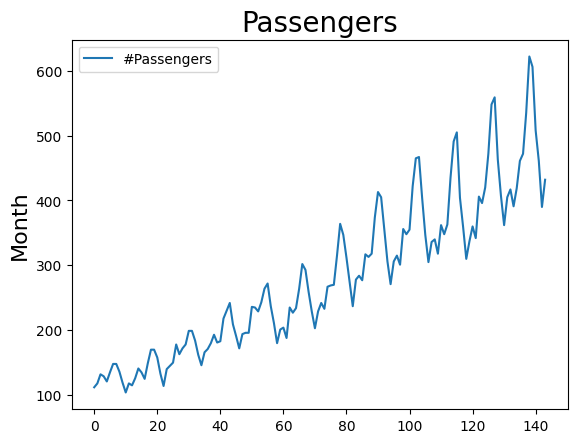

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df.plot()
plt.title('Passengers', fontsize=20)
plt.ylabel('Month', fontsize=16)
#for year in range(start_date.year,end_date.year):
#    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
#plt.axhline(lim_catfish_sales.mean(), color='r', alpha=0.2, linestyle='--')

Есть тренд, есть сезонность -> нестационарный

array([[<Axes: title={'center': '#Passengers'}>]], dtype=object)

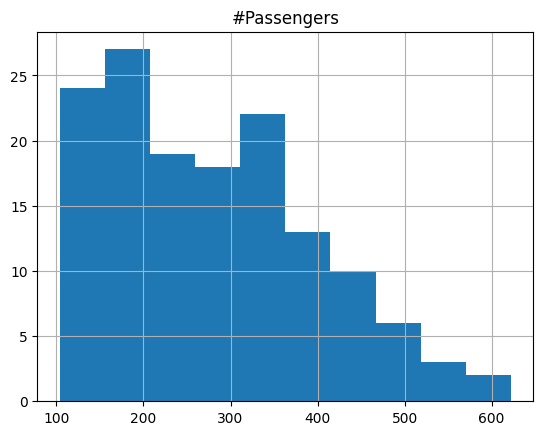

In [ ]:
df.hist()

In [ ]:
#df['Month']=pd.to_datetime(df['Month'])
#df['Month'].astype(float)
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
indexedDataset = df.set_index(['Month'])

from datetime import datetime
indexedDataset['1949-03']
indexedDataset['1949-03':'1949-06']
indexedDataset['1949']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<ipython-input-22-f5da46700cf1>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  indexedDataset['1949-03']
<ipython-input-22-f5da46700cf1>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  indexedDataset['1949']


In [ ]:
first_diff = df[['#Passengers']].diff()[1:]

Text(0, 0.5, '#Passengers')

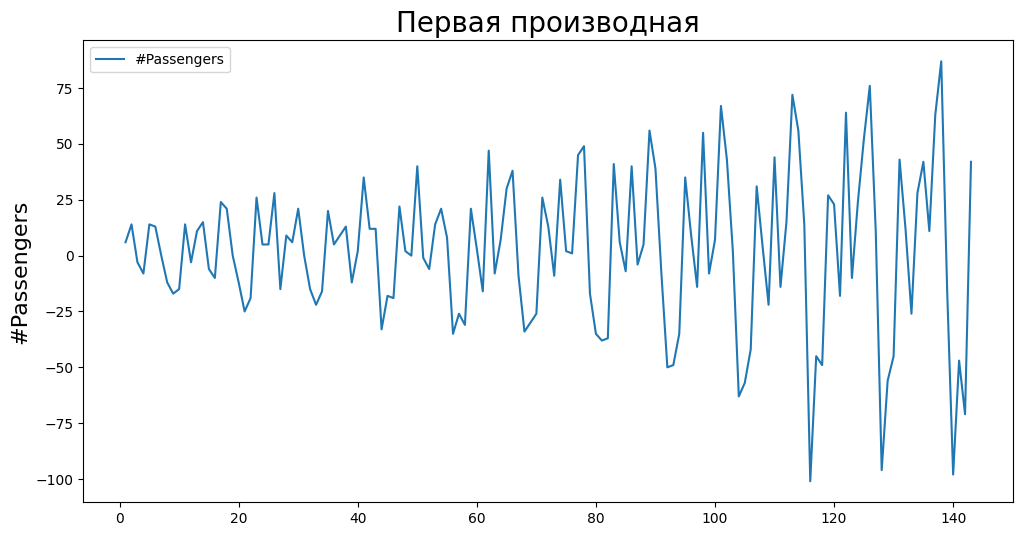

In [ ]:
first_diff.plot(figsize=(12,6))
plt.title('Первая производная', fontsize=20)
plt.ylabel('#Passengers', fontsize=16)

In [ ]:
df=indexedDataset

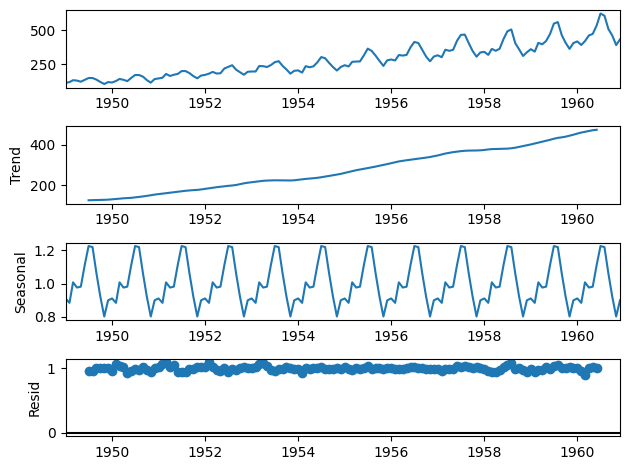

In [ ]:
#rcParams['figure.figsize'] = 11, 9
decomposition = seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()
plt.show()

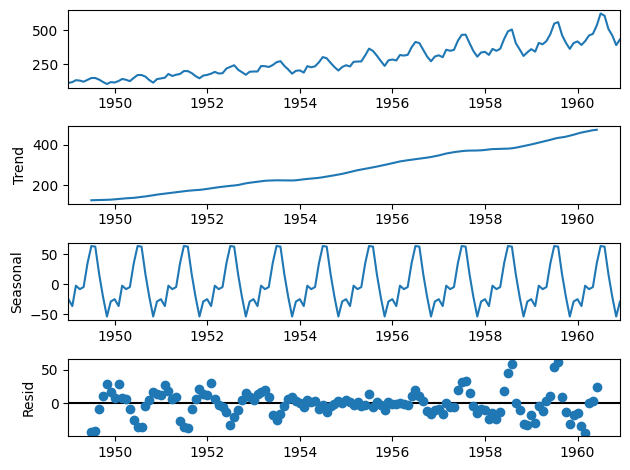

In [ ]:
#rcParams['figure.figsize'] = 11, 9
decomposition = seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
def Dickey_Fuller_test(timeseries):
    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    if dftest[0] < dftest[4]["5%"]:
      print ("Reject Ho - Time Series is Stationary")
    else:
      print ("Failed to Reject Ho - Time Series is Non-Stationary")
    print(dfoutput)
                   

In [ ]:
Dickey_Fuller_test(df)

Failed to Reject Ho - Time Series is Non-Stationary
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value=0.991880 намного > уровня значимости 0,05

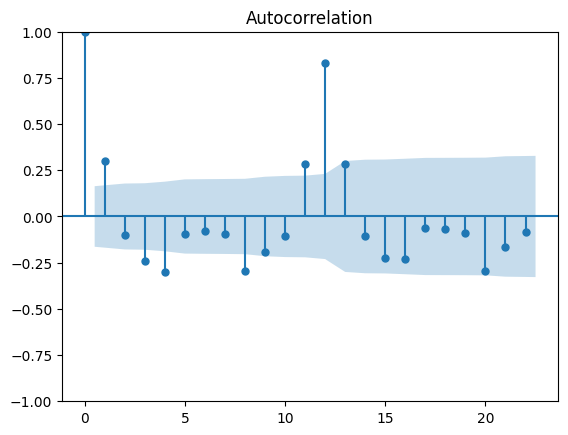

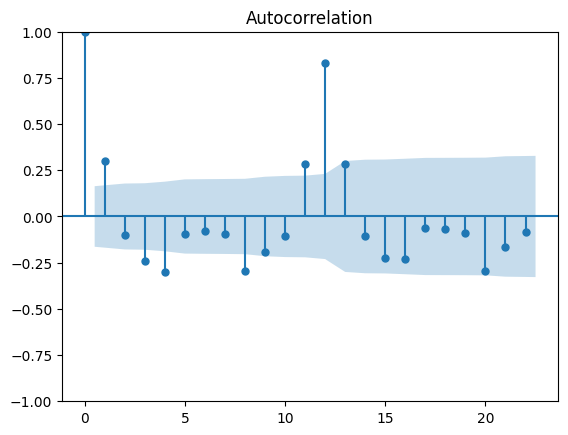

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(first_diff)

In [ ]:
#лаг примерно 11-13

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


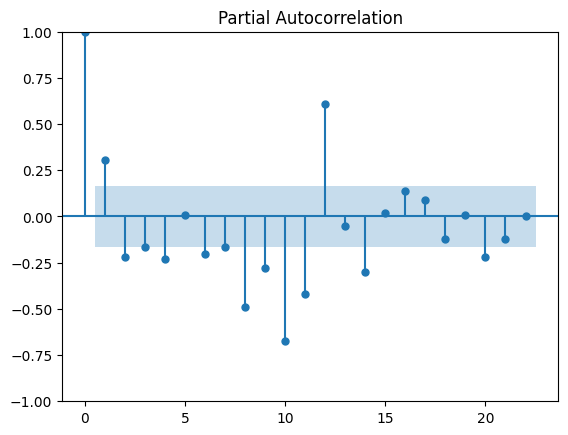

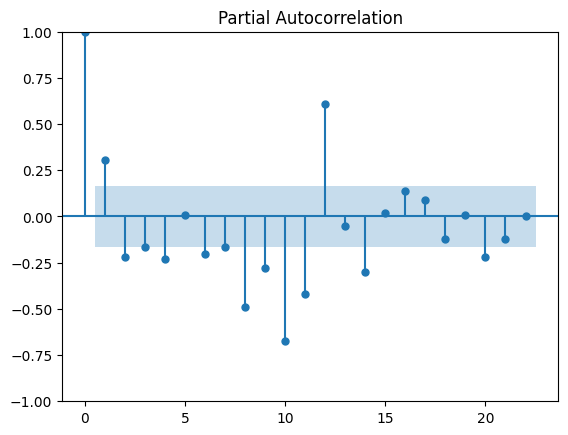

In [ ]:
sm.graphics.tsa.plot_pacf(first_diff)

In [ ]:
percentage = 80
partition = int(len(first_diff)*percentage/100)
train_data, test_data =first_diff[:partition],  first_diff[partition:]
from datetime import timedelta

In [ ]:
model = sm.tsa.arima.ARIMA(train_data, order=(12,0,4))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                ARIMA(12, 0, 4)   Log Likelihood                -418.256
Date:                Sun, 09 Apr 2023   AIC                            872.511
Time:                        18:29:56   BIC                            921.763
Sample:                             0   HQIC                           892.500
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8777      0.900      3.199      0.001       1.115       4.641
ar.L1          0.1618      0.139      1.168      0.243      -0.110       0.433
ar.L2         -0.2344      0.149     -1.568      0.1

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Остатки после обучения', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

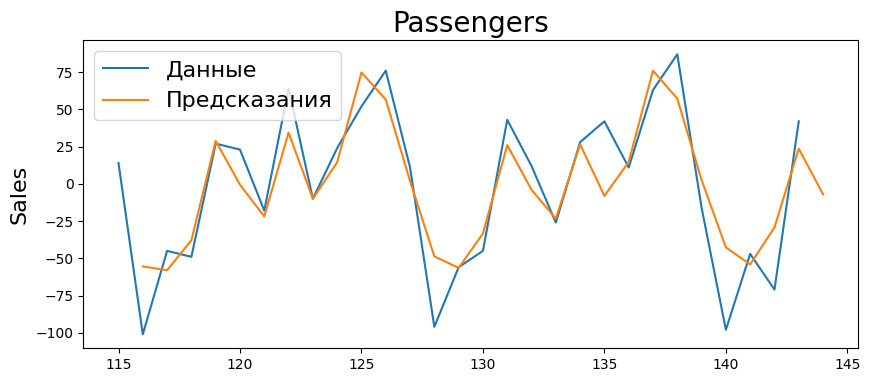

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Данные', 'Предсказания'), fontsize=16)

plt.title('Passengers', fontsize=20)
plt.ylabel('Sales', fontsize=16)